In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
col_names = ['c{0:02d}'.format(i) for i in range(10)]
gcode = pd.read_csv('sample_gcode.csv', sep='\s', names=col_names)

C:\Users\jay0423\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [25]:
gcode.c00.value_counts()

G1                          28355
G0                           4835
M204                         2351
M205                         2350
;TYPE:WALL-OUTER              240
                            ...  
;TIME_ELAPSED:915.776486        1
;TIME_ELAPSED:470.127028        1
;LAYER:52                       1
;TIME_ELAPSED:161.272004        1
;TIME_ELAPSED:485.380701        1
Name: c00, Length: 510, dtype: int64

In [30]:
gcode.replace('G0', 'G1', inplace=True)

In [31]:
gcode.c00.value_counts()

G1                          33190
M204                         2351
M205                         2350
;TYPE:WALL-OUTER              240
;TYPE:WALL-INNER              240
                            ...  
;TIME_ELAPSED:915.776486        1
;TIME_ELAPSED:470.127028        1
;LAYER:52                       1
;TIME_ELAPSED:161.272004        1
;TIME_ELAPSED:485.380701        1
Name: c00, Length: 509, dtype: int64

In [51]:
col_names = ['c{0:02d}'.format(i) for i in range(10)]
gcode_original = pd.read_csv('sample_gcode_layer225.csv', sep='\s', names=col_names)
gcode = gcode_original.replace('G0', 'G1')
gcode.c00.value_counts()

C:\Users\jay0423\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


G1                           143
M205                           8
M204                           8
;TYPE:WALL-OUTER               1
;LAYER:225                     1
;TIME_ELAPSED:1219.630833      1
;TYPE:WALL-INNER               1
Name: c00, dtype: int64

In [44]:
gcode.index = gcode.c00
gcode.drop('c00', axis=1, inplace=True)

In [45]:
gcode

,c01,c02,c03,c04,c05,c06,c07,c08,c09
c00,,,,,,,,,
;LAYER:225,None,None,None,None,NaN,NaN,NaN,NaN,NaN
G1,X106.4,Y106.4,Z33.95,None,NaN,NaN,NaN,NaN,NaN
M204,S500,None,None,None,NaN,NaN,NaN,NaN,NaN
M205,X20,Y20,None,None,NaN,NaN,NaN,NaN,NaN
;TYPE:WALL-INNER,None,None,None,None,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
G1,X105.999,Y107.829,E936.71809,None,NaN,NaN,NaN,NaN,NaN
G1,X105.999,Y107.546,E936.72462,None,NaN,NaN,NaN,NaN,NaN
G1,F7200,X106,Y107.361,None,NaN,NaN,NaN,NaN,NaN


In [53]:
gcode = gcode[gcode.c00=='G1']
gcode

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09
1,G1,X106.4,Y106.4,Z33.95,None,NaN,NaN,NaN,NaN,NaN
5,G1,F4800,X106.4,Y113.6,E933.00465,NaN,NaN,NaN,NaN,NaN
6,G1,X113.6,Y113.6,E933.18426,None,NaN,NaN,NaN,NaN,NaN
7,G1,X113.6,Y106.4,E933.36386,None,NaN,NaN,NaN,NaN,NaN
8,G1,X106.4,Y106.4,E933.54347,None,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
157,G1,X105.999,Y108.111,E936.71158,None,NaN,NaN,NaN,NaN,NaN
158,G1,X105.999,Y107.829,E936.71809,None,NaN,NaN,NaN,NaN,NaN
159,G1,X105.999,Y107.546,E936.72462,None,NaN,NaN,NaN,NaN,NaN
160,G1,F7200,X106,Y107.361,None,NaN,NaN,NaN,NaN,NaN


In [102]:
new_gcode = pd.DataFrame(np.zeros([len(gcode), 4]), index=np.arange(1, len(gcode) + 1), columns=['X', 'Y', 'Z', 'E'])

In [65]:
col = ['X', 'Y', 'Z', 'E']
new_gcode.iloc[0].loc[col[0]]

0.0

In [73]:
new_gcode.iloc[0].loc[gcode.c01.iloc[0][0]] = float(gcode.c01.iloc[0][1:])

In [84]:
gcode.dropna(axis=1, how='all', inplace=True)
gcode.fillna(0, inplace=True)
gcode

,c00,c01,c02,c03,c04
1,G1,X106.4,Y106.4,Z33.95,0
5,G1,F4800,X106.4,Y113.6,E933.00465
6,G1,X113.6,Y113.6,E933.18426,0
7,G1,X113.6,Y106.4,E933.36386,0
8,G1,X106.4,Y106.4,E933.54347,0
...,...,...,...,...,...
157,G1,X105.999,Y108.111,E936.71158,0
158,G1,X105.999,Y107.829,E936.71809,0
159,G1,X105.999,Y107.546,E936.72462,0
160,G1,F7200,X106,Y107.361,0


In [105]:
new_gcode.iloc[0].loc[gcode['c0{}'.format(1)].iloc[0][0]] = float(gcode['c0{}'.format(1)].iloc[0][1:])

In [119]:
new_gcode = pd.DataFrame(np.zeros([len(gcode), 4]), index=np.arange(1, len(gcode) + 1), columns=['X', 'Y', 'Z', 'E'])
for i in range(len(gcode)):
    for j in range(4):
        if gcode['c0{}'.format(j + 1)].iloc[i] != 0:
            new_gcode.iloc[i].loc[gcode['c0{}'.format(j + 1)].iloc[i][0]] = float(gcode['c0{}'.format(j + 1)].iloc[i][1:])

In [122]:
new_gcode.iloc[1]

X    106.40000
Y    113.60000
Z      0.00000
E    933.00465
Name: 2, dtype: float64

In [123]:
new_gcode.index = gcode.index

In [124]:
new_gcode

,X,Y,Z,E
1,106.400,106.400,33.95,0.00000
5,106.400,113.600,0.00,933.00465
6,113.600,113.600,0.00,933.18426
7,113.600,106.400,0.00,933.36386
8,106.400,106.400,0.00,933.54347
...,...,...,...,...
157,105.999,108.111,0.00,936.71158
158,105.999,107.829,0.00,936.71809
159,105.999,107.546,0.00,936.72462
160,106.000,107.361,0.00,0.00000


# new_gcode > gcode

In [126]:
gcode = new_gcode.copy()

In [127]:
gcode

,X,Y,Z,E
1,106.400,106.400,33.95,0.00000
5,106.400,113.600,0.00,933.00465
6,113.600,113.600,0.00,933.18426
7,113.600,106.400,0.00,933.36386
8,106.400,106.400,0.00,933.54347
...,...,...,...,...
157,105.999,108.111,0.00,936.71158
158,105.999,107.829,0.00,936.71809
159,105.999,107.546,0.00,936.72462
160,106.000,107.361,0.00,0.00000


In [128]:
xmin = min(gcode.X)
xmax = max(gcode.X)
ymin = min(gcode.Y)
ymax = max(gcode.Y)

(104.2, 115.8)

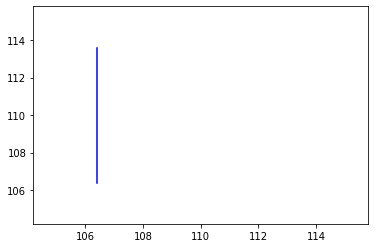

In [130]:
from_X = gcode.X.iloc[0]
from_Y = gcode.Y.iloc[0]
to_X = gcode.X.iloc[1]
to_Y = gcode.Y.iloc[1]
plt.plot([from_X, from_Y], [to_X, to_Y], 'b-')
plt.xlim(xmin - 1, xmax + 1)
plt.ylim(ymin - 1, ymax + 1)

(104.2, 115.8)

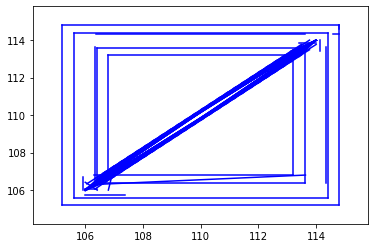

In [133]:
for i in range(len(gcode) - 1):
    from_X = gcode.X.iloc[i]
    from_Y = gcode.Y.iloc[i]
    to_X = gcode.X.iloc[i + 1]
    to_Y = gcode.Y.iloc[i + 1]
    plt.plot([from_X, from_Y], [to_X, to_Y], 'b-')
plt.xlim(xmin - 1, xmax + 1)
plt.ylim(ymin - 1, ymax + 1)

(104.2, 115.8)

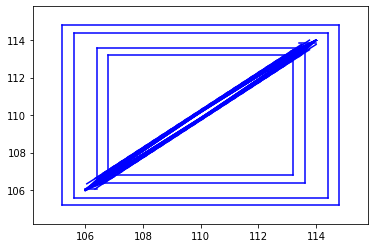

In [143]:
for i in range(len(gcode) - 1):
    if gcode.E.iloc[i + 1] != 0:
        from_X = gcode.X.iloc[i]
        from_Y = gcode.Y.iloc[i]
        to_X = gcode.X.iloc[i + 1]
        to_Y = gcode.Y.iloc[i + 1]
        plt.plot([from_X, from_Y], [to_X, to_Y], 'b-')

plt.xlim(xmin - 1, xmax + 1)
plt.ylim(ymin - 1, ymax + 1)

In [151]:
import time
import math

In [154]:
def _update(frame, x, y):
    """グラフを更新するための関数"""
    # 現在のグラフを消去する
    plt.cla()
    # データを更新 (追加) する
    x.append(frame)
    y.append(math.sin(frame))
    # 折れ線グラフを再描画する
    plt.plot(x, y)
    
fig= plt.figure(figsize=(10, 6))
x = []
y = []
params = {
    'fig': fig,
    'func': _update,  # グラフを更新する関数
    'fargs': (x, y),  # 関数の引数 (フレーム番号を除く)
    'interval': 10,  # 更新間隔 (ミリ秒)
    'frames': np.arange(0, 10, 0.1),  # フレーム番号を生成するイテレータ
    'repeat': False,  # 繰り返さない
}
anime = animation.FuncAnimation(**params)
plt.show()

<Figure size 720x432 with 0 Axes>

In [148]:
from matplotlib import animation

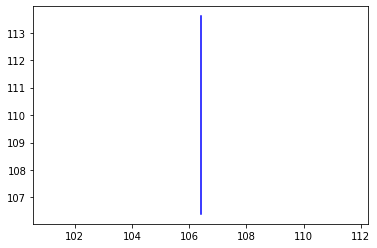

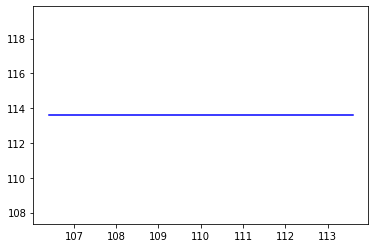

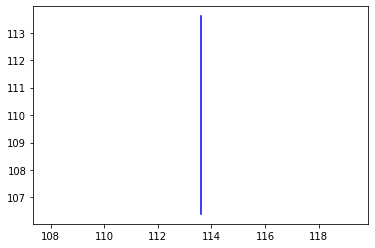

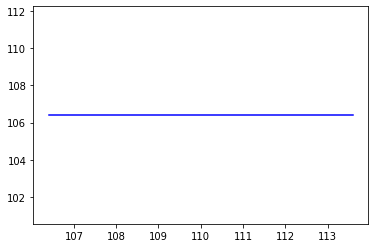

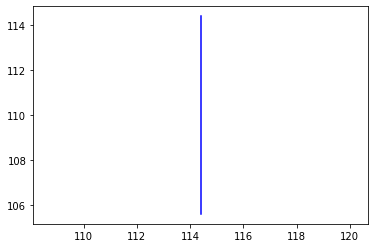

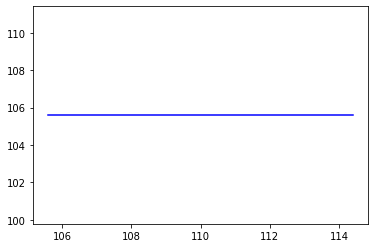

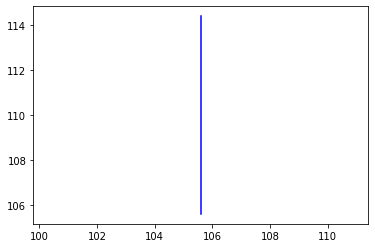

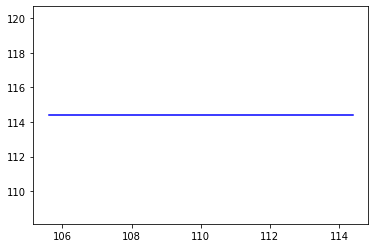

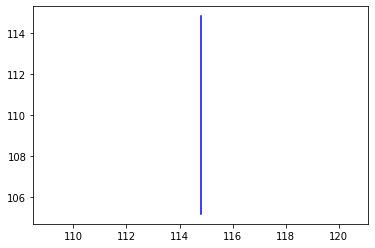

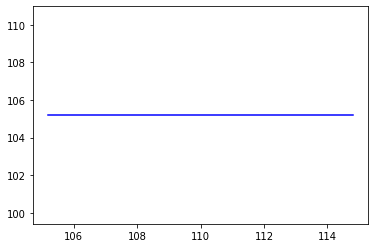

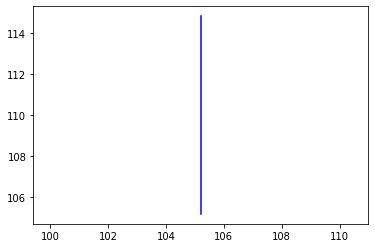

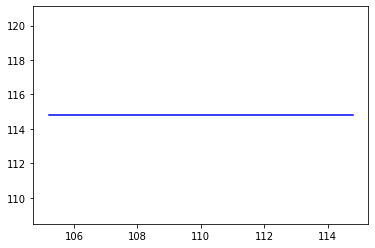

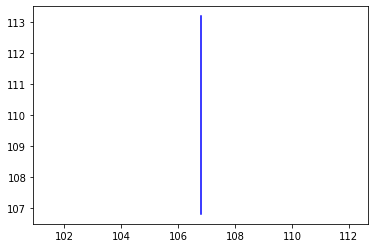

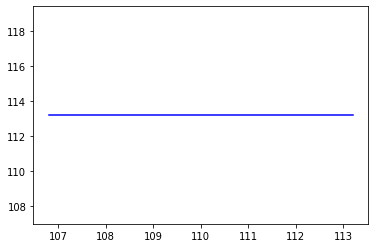

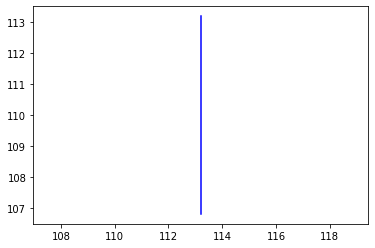

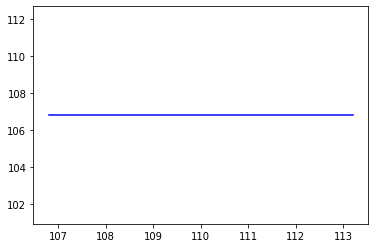

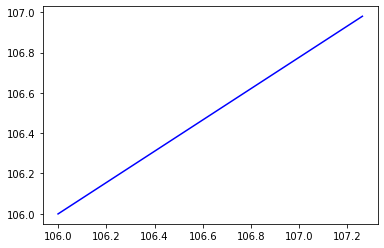

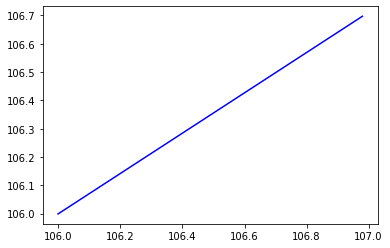

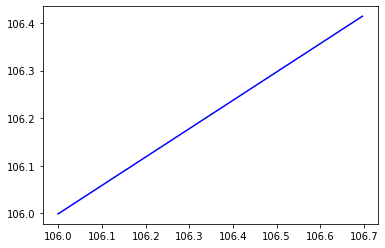

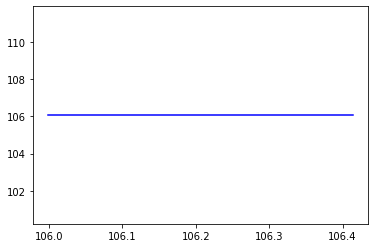

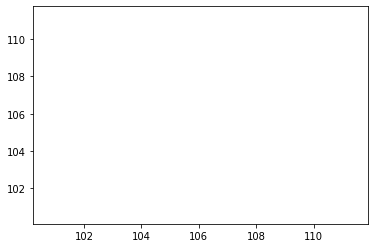

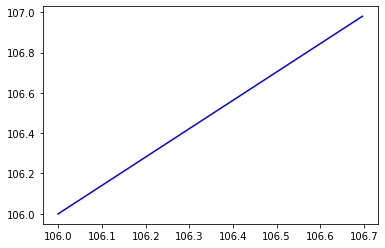

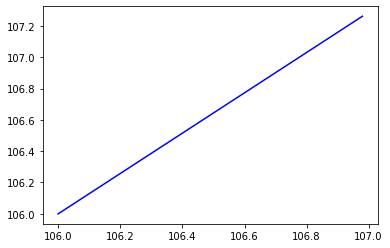

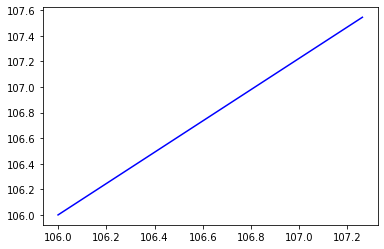

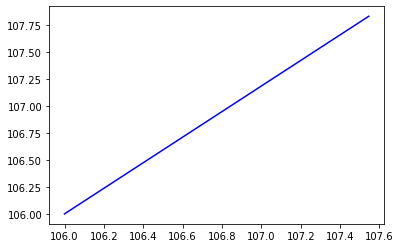

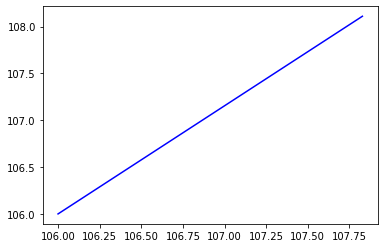

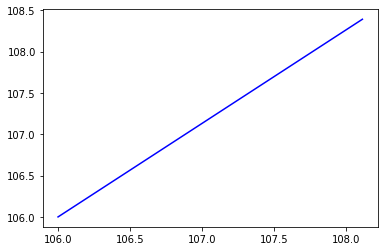

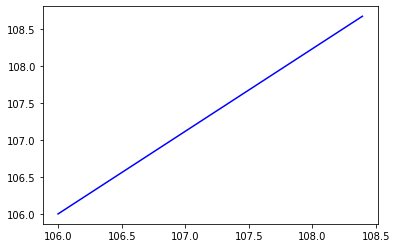

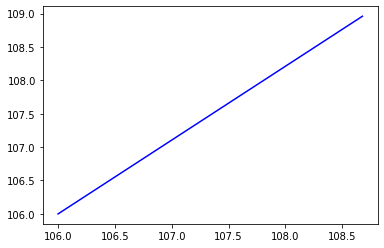

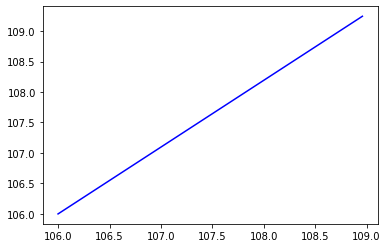

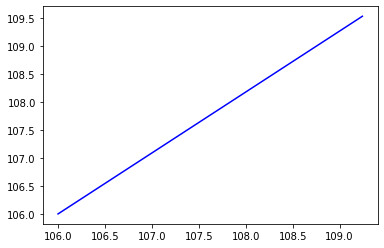

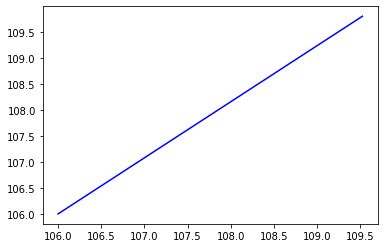

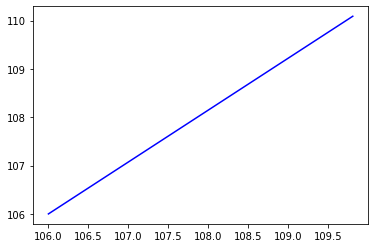

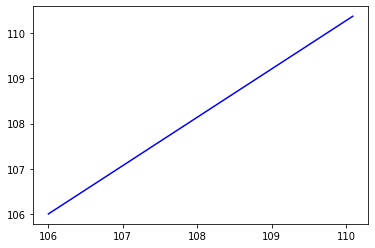

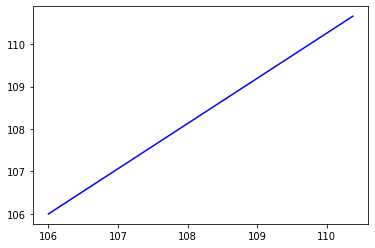

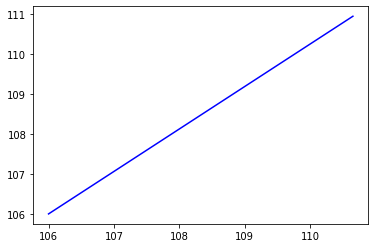

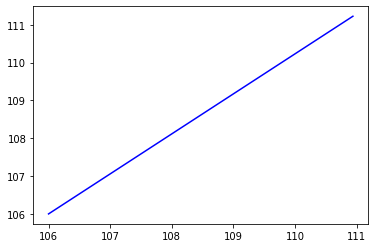

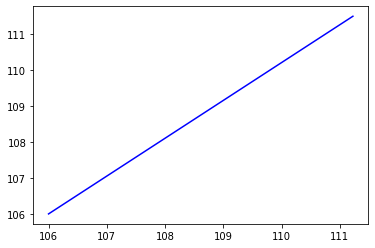

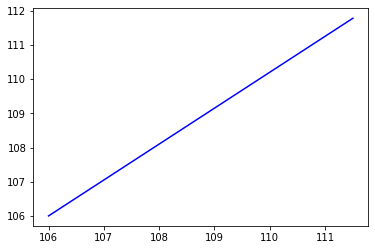

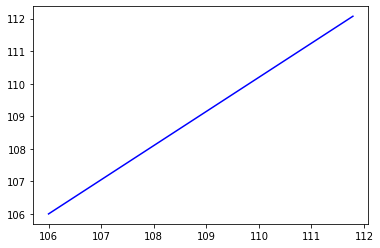

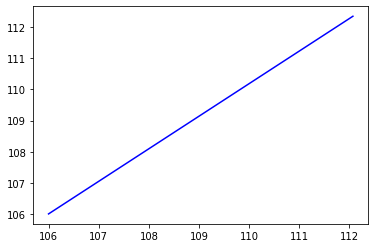

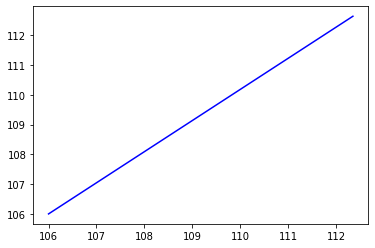

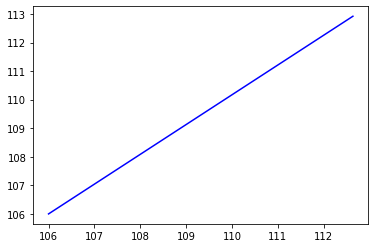

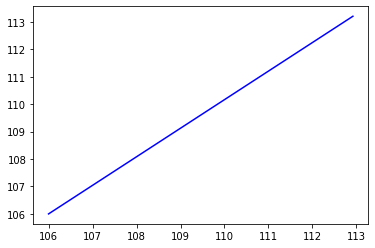

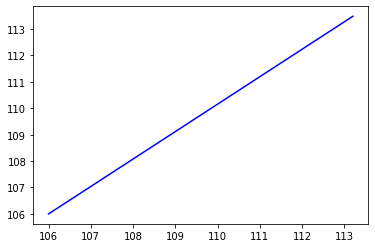

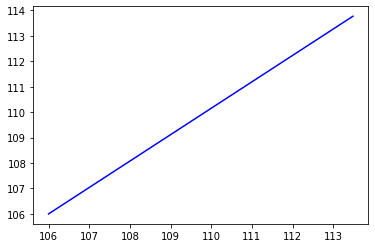

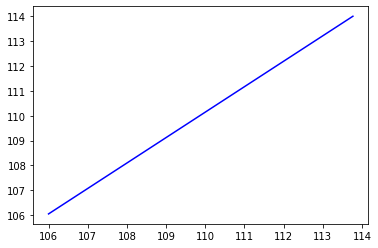

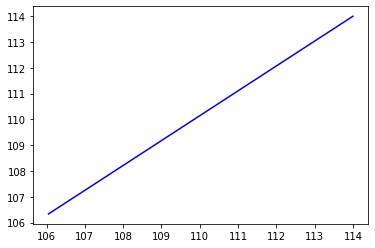

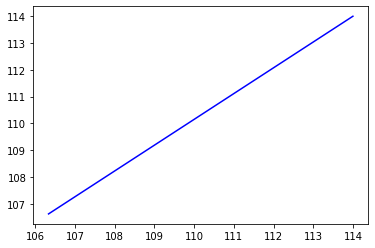

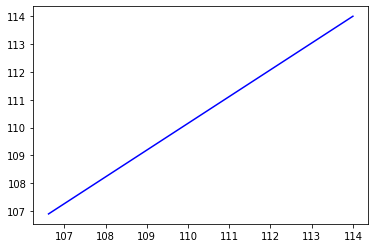

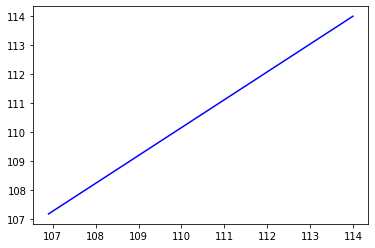

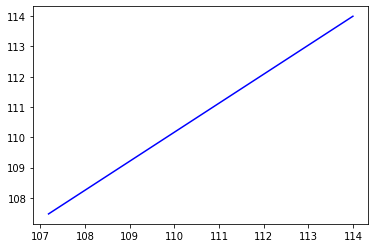

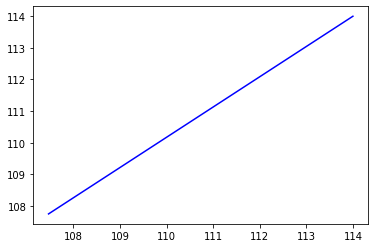

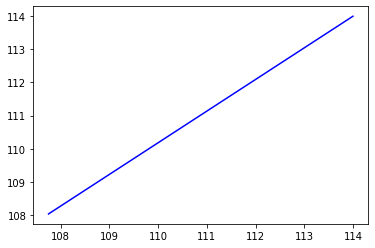

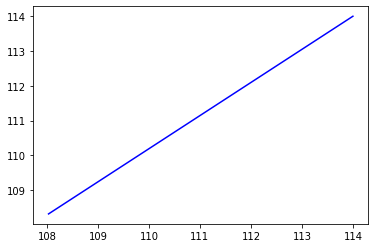

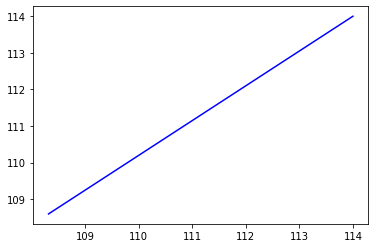

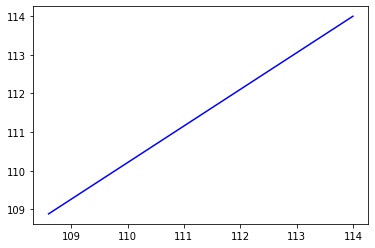

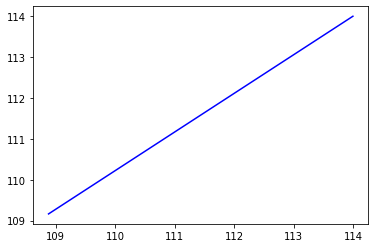

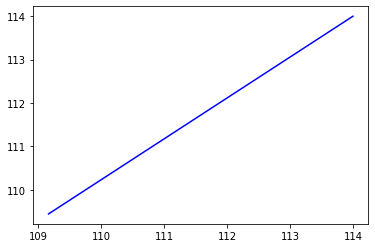

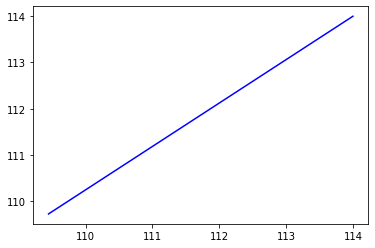

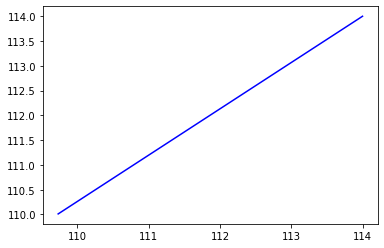

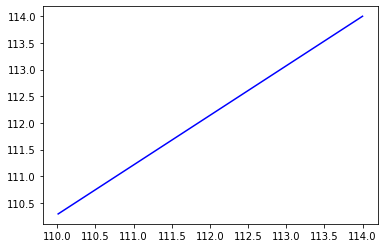

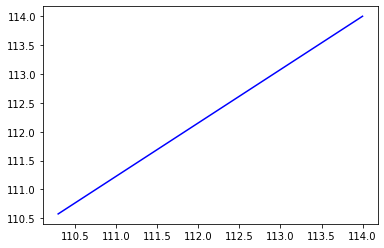

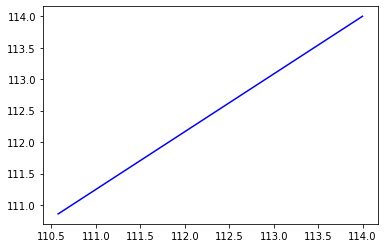

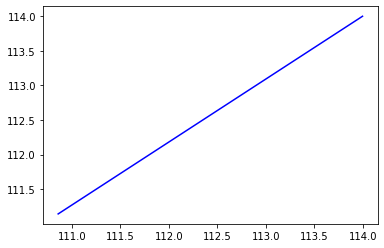

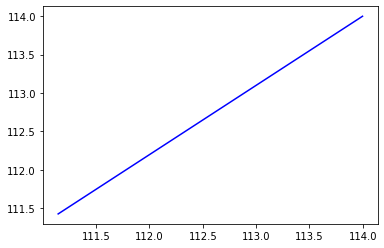

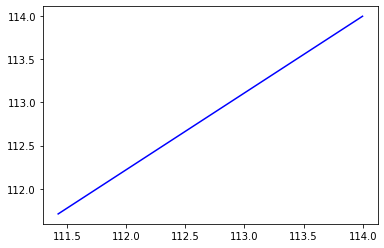

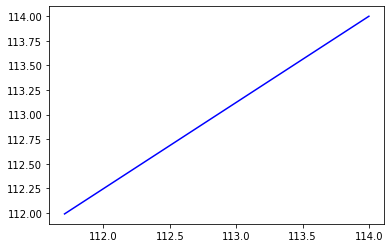

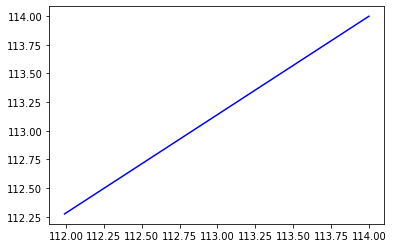

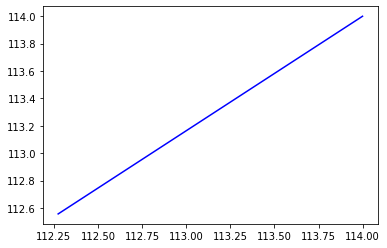

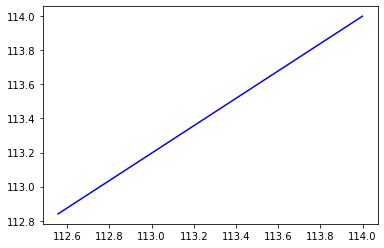

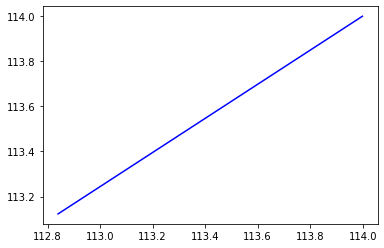

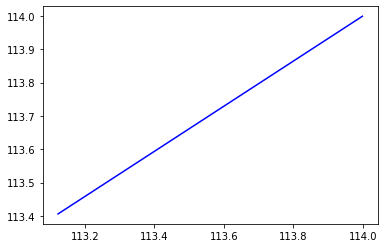

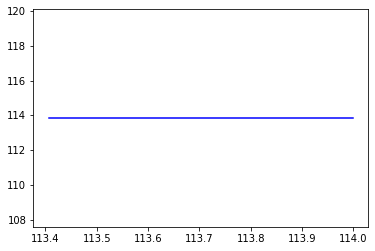

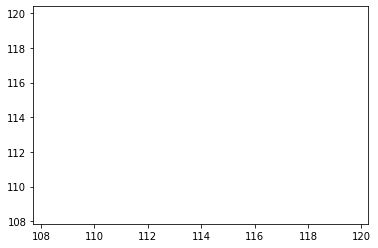

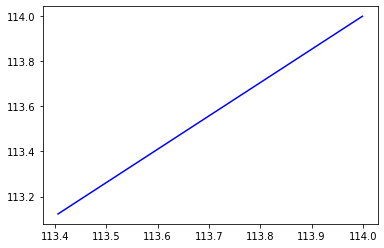

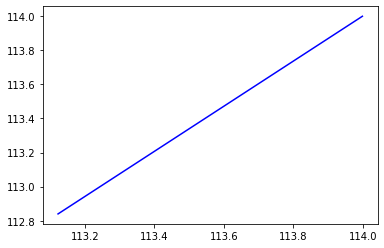

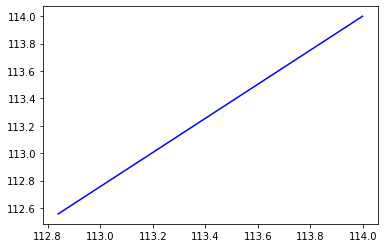

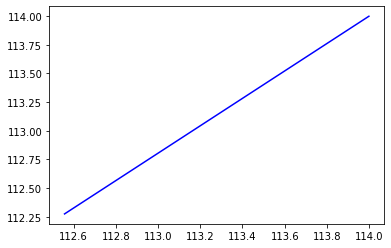

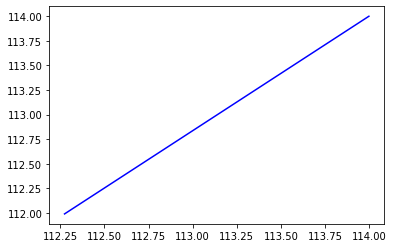

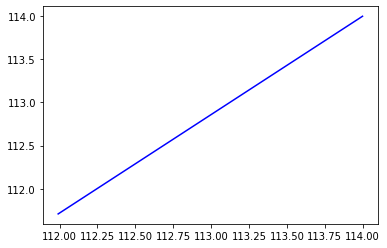

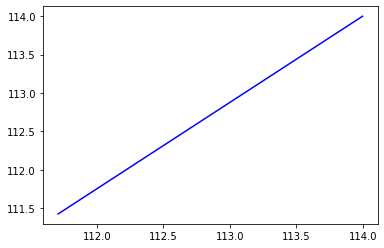

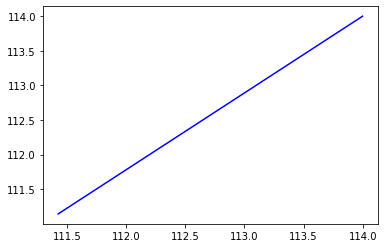

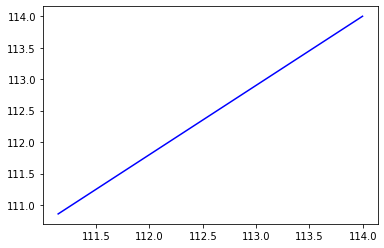

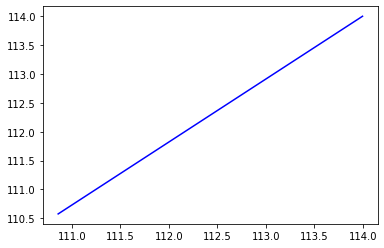

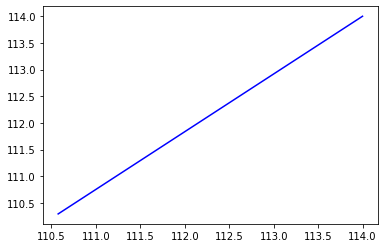

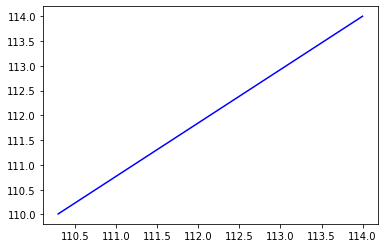

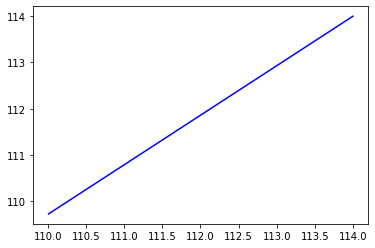

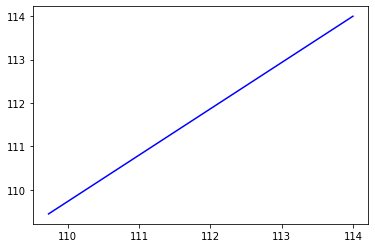

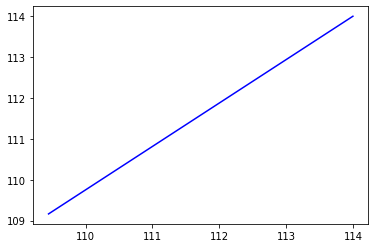

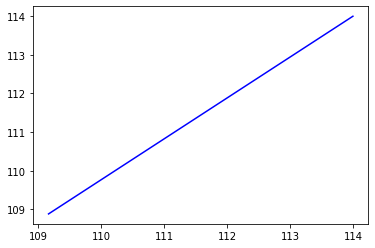

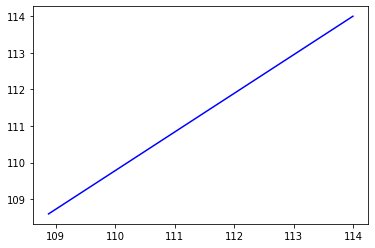

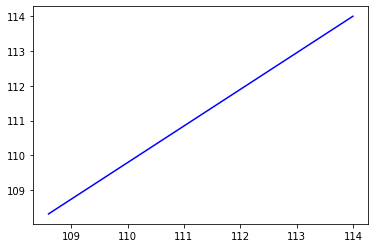

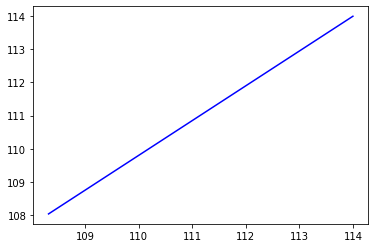

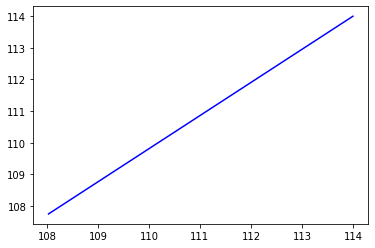

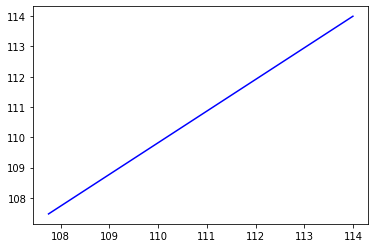

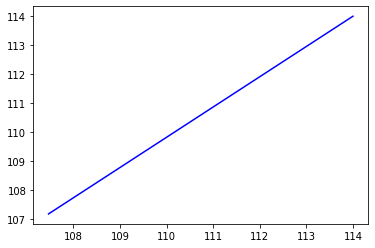

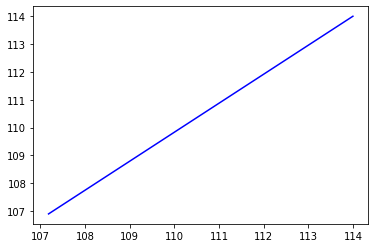

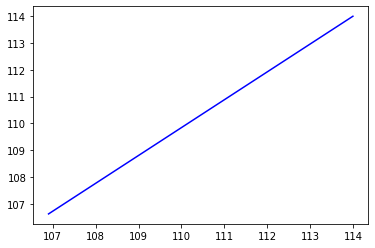

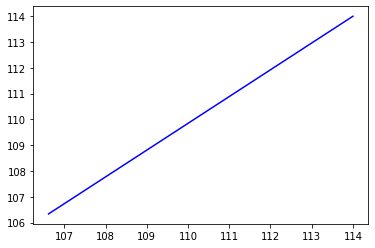

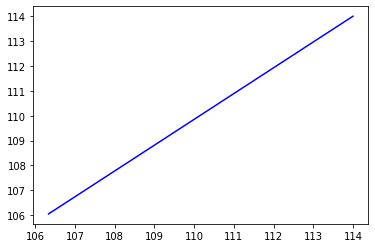

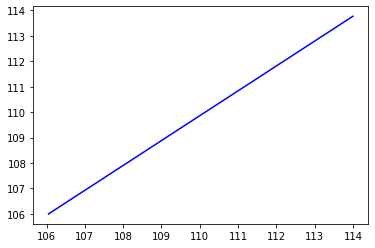

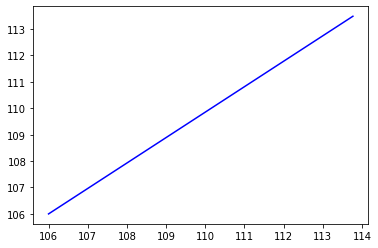

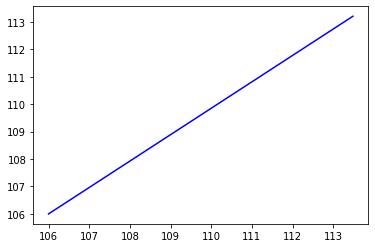

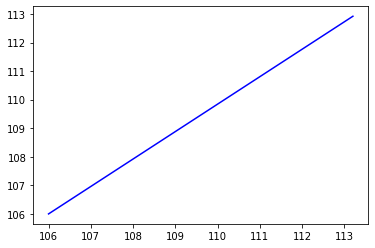

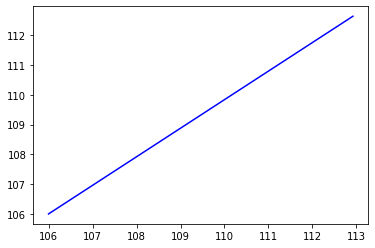

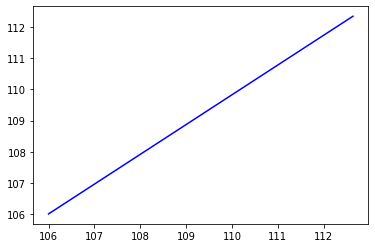

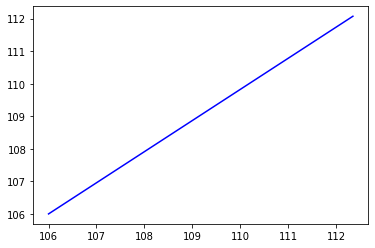

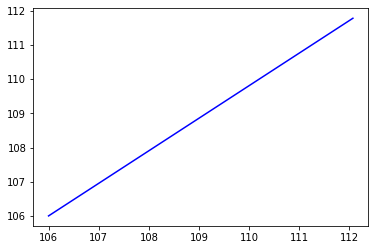

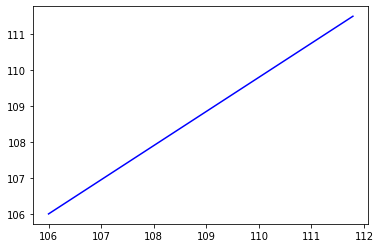

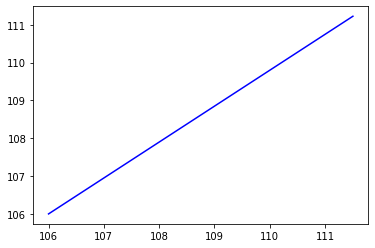

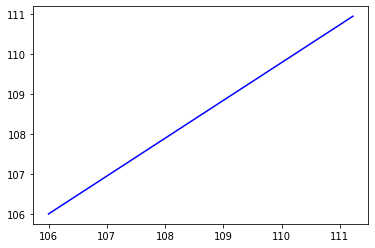

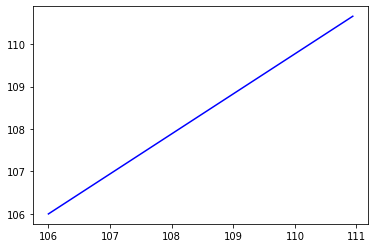

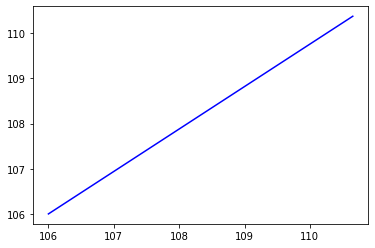

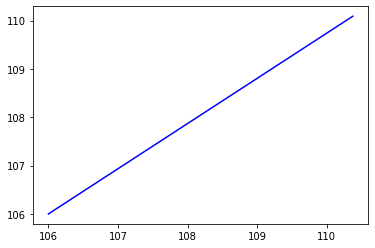

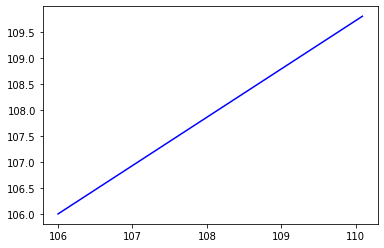

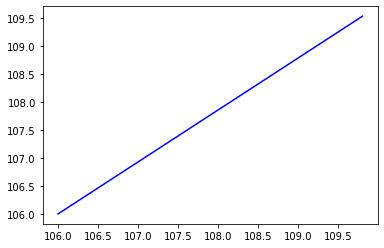

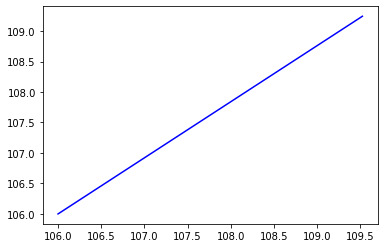

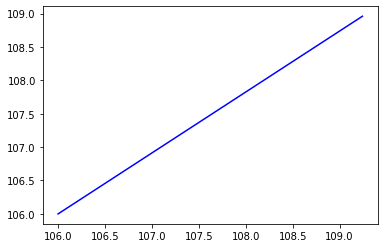

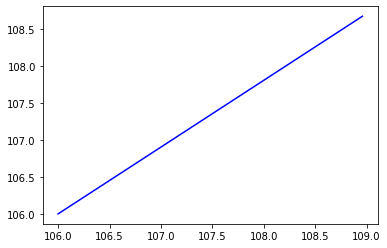

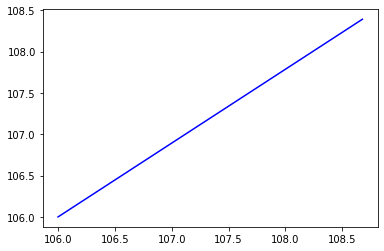

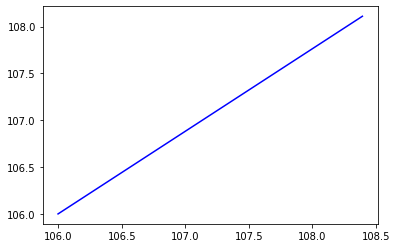

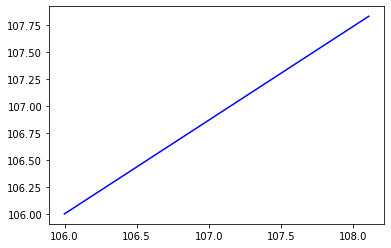

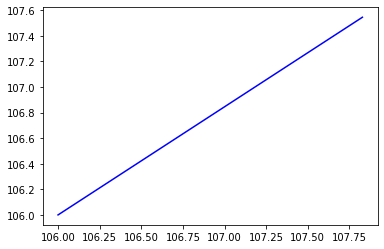

(104.2, 115.8)

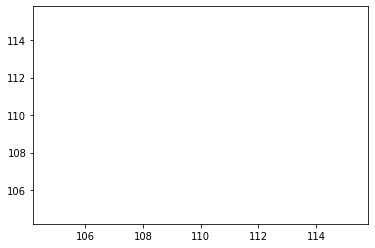

In [158]:
for i in range(len(gcode) - 1):
    # 更新待機（秒）
    plt.pause(0.05)
    if gcode.E.iloc[i + 1] != 0:
        from_X = gcode.X.iloc[i]
        from_Y = gcode.Y.iloc[i]
        to_X = gcode.X.iloc[i + 1]
        to_Y = gcode.Y.iloc[i + 1]
        plt.plot([from_X, from_Y], [to_X, to_Y], 'b-')

plt.xlim(xmin - 1, xmax + 1)
plt.ylim(ymin - 1, ymax + 1)

In [159]:
gcode

,X,Y,Z,E
1,106.400,106.400,33.95,0.00000
5,106.400,113.600,0.00,933.00465
6,113.600,113.600,0.00,933.18426
7,113.600,106.400,0.00,933.36386
8,106.400,106.400,0.00,933.54347
...,...,...,...,...
157,105.999,108.111,0.00,936.71158
158,105.999,107.829,0.00,936.71809
159,105.999,107.546,0.00,936.72462
160,106.000,107.361,0.00,0.00000


In [160]:
gcode['E2'] = gcode.E.diff()

In [162]:
gcode[gcode.E2 < 0]

,X,Y,Z,E,E2
11,106.330,106.330,0.0,0.0,-933.54347
23,114.800,114.800,0.0,0.0,-934.42153
33,114.600,114.800,0.0,0.0,-935.37943
46,106.800,107.000,0.0,0.0,-936.01802
51,106.414,105.999,0.0,0.0,-936.03761
54,106.697,105.999,0.0,0.0,-936.05165
108,113.985,113.985,0.0,0.0,-936.40032
110,113.406,113.999,0.0,0.0,-936.40482
160,106.000,107.361,0.0,0.0,-936.72462


In [178]:
gcode.drop('E2', axis=1, inplace=True)
gcode

,X,Y,Z,E
1,106.400,106.400,33.95,0.00000
5,106.400,113.600,0.00,933.00465
6,113.600,113.600,0.00,933.18426
7,113.600,106.400,0.00,933.36386
8,106.400,106.400,0.00,933.54347
...,...,...,...,...
157,105.999,108.111,0.00,936.71158
158,105.999,107.829,0.00,936.71809
159,105.999,107.546,0.00,936.72462
160,106.000,107.361,0.00,0.00000


In [201]:
xdata = 110.86
ydata = 109.69
ana = 6
search_gcode = gcode[(gcode.X < xdata + (ana / 2 + 0.25)) & (gcode.X > xdata - (ana / 2 + 0.5)) & (gcode.Y < ydata + (ana / 2 + 0.5)) & (gcode.Y > ydata - (ana / 2 + 0.25))]
search_gcode['distance'] = ((search_gcode['X'] - xdata) ** 2 + (search_gcode['Y'] - ydata) ** 2) ** 0.5

C:\Users\jay0423\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [203]:
search_gcode.sort_values('distance')

,X,Y,Z,E,distance
93,113.999,109.729,0.0,936.30620,3.139242
92,113.999,109.446,0.0,936.29967,3.148469
94,113.999,110.011,0.0,936.31271,3.155370
91,113.999,109.163,0.0,936.29314,3.182931
95,113.999,110.294,0.0,936.31924,3.196582
90,113.999,108.880,0.0,936.28661,3.241824
96,113.999,110.577,0.0,936.32577,3.261915
89,113.999,108.597,0.0,936.28008,3.323849
97,113.999,110.860,0.0,936.33230,3.349958
88,113.999,108.314,0.0,936.27355,3.427345


In [213]:
xdata = 106.869
ydata = 106.876
margin = 0.4
search_gcode = gcode[(gcode.X < xdata + margin / 2) & (gcode.X > xdata - margin / 2) & (gcode.Y < ydata + margin / 2) & (gcode.Y > ydata - margin / 2)]

In [215]:
search_gcode

,X,Y,Z,E
37,106.8,106.8,0.0,0.00000
43,106.8,106.8,0.0,936.01802
46,106.8,107.0,0.0,0.00000


In [216]:
search_gcode['distance'] = ((search_gcode['X'] - xdata) ** 2 + (search_gcode['Y'] - ydata) ** 2) ** 0.5

C:\Users\jay0423\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
search_gcode.sort_values('distance')

,X,Y,Z,E,distance
37,106.8,106.8,0.0,0.00000,0.102650
43,106.8,106.8,0.0,936.01802,0.102650
46,106.8,107.0,0.0,0.00000,0.141905


In [228]:
new_gcode = gcode.copy()
for i in range(len(gcode) - 1):
    if gcode.iloc[i + 1].E == 0:
        new_gcode.drop(gcode.iloc[i].name, inplace=True)

In [229]:
new_gcode

,X,Y,Z,E
1,106.400,106.400,33.95,0.00000
5,106.400,113.600,0.00,933.00465
6,113.600,113.600,0.00,933.18426
7,113.600,106.400,0.00,933.36386
14,114.400,114.400,0.00,0.00000
...,...,...,...,...
155,105.999,108.677,0.00,936.69852
156,105.999,108.394,0.00,936.70505
157,105.999,108.111,0.00,936.71158
158,105.999,107.829,0.00,936.71809


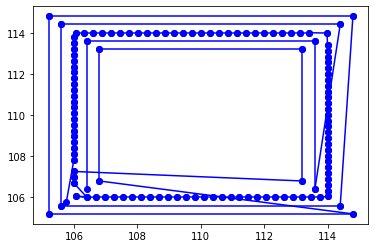

In [231]:
for i in range(len(new_gcode) - 1):
    from_X = new_gcode.X.iloc[i]
    from_Y = new_gcode.Y.iloc[i]
    to_X = new_gcode.X.iloc[i + 1]
    to_Y = new_gcode.Y.iloc[i + 1]
    plt.plot([from_X, to_X], [from_Y, to_Y], 'b-')
    plt.plot(from_X, from_Y, marker='o', color='blue')
    plt.plot(to_X, to_Y, marker='o', color='blue')

In [233]:
xdata = 106.869
ydata = 106.876
margin = 0.4
search_gcode = new_gcode[(new_gcode.X < xdata + margin / 2) & (new_gcode.X > xdata - margin / 2) & (new_gcode.Y < ydata + margin / 2) & (new_gcode.Y > ydata - margin / 2)]
search_gcode

,X,Y,Z,E
37,106.8,106.8,0.0,0.0


In [234]:
np.mean([1,2,3,4])

2.5

In [235]:
gcode

,X,Y,Z,E
1,106.400,106.400,33.95,0.00000
5,106.400,113.600,0.00,933.00465
6,113.600,113.600,0.00,933.18426
7,113.600,106.400,0.00,933.36386
8,106.400,106.400,0.00,933.54347
...,...,...,...,...
157,105.999,108.111,0.00,936.71158
158,105.999,107.829,0.00,936.71809
159,105.999,107.546,0.00,936.72462
160,106.000,107.361,0.00,0.00000


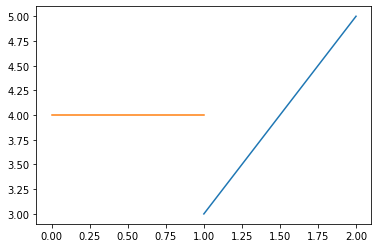

In [236]:
x = [1, 2]
y = [3, 5]
z = [4, 4]
plt.plot(x, y, z)

In [237]:
col_names = ['c{0:02d}'.format(i) for i in range(10)]
printing_gcode = pd.read_csv('sample_gcode.csv', sep='\s+', names=col_names)

In [238]:
printing_gcode

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09
0,;FLAVOR:Marlin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,;TIME:1310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,;Filament,used:,0.999421m,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,;Layer,height:,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,;Generated,with,Cura_SteamEngine,3.4.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
38916,;SETTING_3,"{""global_quality"":",[general]\\nversion = 4\\nname = Low Quality #...,extruder_quality:,"[""[general]\\nversion",=,4\\nname,NaN,NaN,NaN
38917,;SETTING_3,=,Low,Quality,#2\\ndefinition,=,fdmprinter\\n\\n[metadata]\\npositio,NaN,NaN,NaN
38918,;SETTING_3,n,=,0\\nquality_type,=,fast\\nsetting_version,=,4\\ntype,=,quality_ch
38919,;SETTING_3,anges\\n\\n[values]\\ngradual_infill_steps,=,0\\ninfill_sparse_densit,NaN,NaN,NaN,NaN,NaN,NaN


In [332]:
printing_gcode[printing_gcode == ';LAYER:226'].dropna(how='all').index[0]

37467

In [270]:
col_names = ['c{0:02d}'.format(i) for i in range(3)]
dropping_gcode = pd.read_csv('dropping_CFRP_gcode.csv', sep='\s+', names=col_names)
dropping_gcode[dropping_gcode == 'X9999']

,c00,c01,c02
0,NaN,X9999,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN


In [274]:
dropping_gcode.replace('X9999', 'X48', inplace=True)
dropping_gcode.replace('Y9999', 'Y78', inplace=True)
dropping_gcode

,c00,c01,c02
0,G0,X48,NaN
1,G4,S1,NaN
2,G0,Y78,NaN
3,G4,S1,NaN
4,M280,P0,S117
5,G4,S1,NaN
6,M280,P0,S35
7,G4,S1,NaN
8,M280,P0,S100


In [284]:
printing_gcode.to_csv('new_sample_gcode.csv', index=False, header=False,
                      sep='\t')

In [279]:
col_names = ['c{0:02d}'.format(i) for i in range(10)]
printing_gcode = pd.read_csv('sample_gcode.csv', sep='\s+', names=col_names)

In [294]:
with open('sample_gcode.csv') as f:
    reader = csv.reader(f)
    print(list(reader))

[[';FLAVOR:Marlin'], [';TIME:1310'], [';Filament used: 0.999421m'], [';Layer height: 0.15'], [';Generated with Cura_SteamEngine 3.4.1'], ['M190 S60'], ['M104 S200'], ['M109 S200'], ['M82 ;absolute extrusion mode'], ['G28 ;Home'], ['G1 Z15.0 F6000 ;Move the platform down 15mm'], [';Prime the extruder'], ['G92 E0'], ['G1 F200 E3'], ['G92 E0'], ['G92 E0'], ['G1 F2400 E-5'], [';LAYER_COUNT:240'], [';LAYER:0'], ['M107'], ['M204 S5000'], ['M205 X30 Y30'], ['G0 F3600 X99.623 Y99.349 Z0.2'], ['M204 S500'], ['M205 X20 Y20'], [';TYPE:SKIRT'], ['G1 F2400 E0'], ['G1 F1800 X100.222 Y98.834 E0.02627'], ['G1 X100.87 Y98.383 E0.05253'], ['G1 X101.561 Y97.999 E0.07883'], ['G1 X102.286 Y97.687 E0.10508'], ['G1 X103.039 Y97.45 E0.13133'], ['G1 X103.813 Y97.291 E0.15761'], ['G1 X104.598 Y97.21 E0.18386'], ['G1 X105 Y97.2 E0.19724'], ['G1 X115 Y97.2 E0.52984'], ['G1 X115.789 Y97.24 E0.55611'], ['G1 X116.569 Y97.359 E0.58236'], ['G1 X117.334 Y97.557 E0.60864'], ['G1 X118.074 Y97.831 E0.63489'], ['G1 X118.78

In [290]:
import csv

In [306]:
col_names = ['c{0:02d}'.format(i) for i in range(2)]
printing_gcode = pd.read_csv('sample_gcode.csv', names=col_names)

In [307]:
printing_gcode

,c00,c01
0,;FLAVOR:Marlin,NaN
1,;TIME:1310,NaN
2,;Filament used: 0.999421m,NaN
3,;Layer height: 0.15,NaN
4,;Generated with Cura_SteamEngine 3.4.1,NaN
...,...,...
38919,";SETTING_3 e = brim\\n\\n""","""extruder_quality"": [""[general]\\nversion = 4..."
38920,;SETTING_3 = Low Quality #2\\ndefinition = fd...,NaN
38921,;SETTING_3 n = 0\\nquality_type = fast\\nsetti...,NaN
38922,;SETTING_3 anges\\n\\n[values]\\ngradual_infil...,NaN


In [312]:
dropping_gcode = pd.read_csv('dropping_CFRP_gcode.csv', names='g')

In [313]:
dropping_gcode

,g
0,G0 X9999
1,G4 S1
2,G0 Y9999
3,G4 S1
4,M280 P0 S117
5,G4 S1
6,M280 P0 S35
7,G4 S1
8,M280 P0 S100


In [314]:
dropping_gcode.replace('G0 X9999', 'G0 X48', inplace=True)
dropping_gcode.replace('G0 Y9999', 'G0 Y78', inplace=True)
dropping_gcode

,g
0,G0 X48
1,G4 S1
2,G0 Y78
3,G4 S1
4,M280 P0 S117
5,G4 S1
6,M280 P0 S35
7,G4 S1
8,M280 P0 S100


In [316]:
dropping_gcode.to_csv('new_sample_gcode.csv', index=False, header=False)

In [317]:
df1 = pd.DataFrame({'A': ['A1', 'A2', 'A3'],
                   'B': ['B1', 'B2', 'B3'],
                   'C': ['C1', 'C2', 'C3']},
                  index=['ONE', 'TWO', 'THREE'])
df2 = pd.DataFrame({'A': ['A1', 'A2', 'A3'],
                   'B': ['B1', 'B2', 'B3'],
                   'C': ['C1', 'C2', 'C3']},
                  index=['Four', 'TWO', 'THREE'])

In [318]:
df1

,A,B,C
ONE,A1,B1,C1
TWO,A2,B2,C2
THREE,A3,B3,C3


In [329]:
pd.concat([df1, df2, df1])

,A,B,C
ONE,A1,B1,C1
TWO,1,2,3
THREE,A3,B3,C3
Four,A1,B1,C1
TWO,A2,B2,C2
THREE,A3,B3,C3
ONE,A1,B1,C1
TWO,1,2,3
THREE,A3,B3,C3


In [336]:
printing_gcode = pd.read_csv('sample_gcode.csv', names=['a', 'b'])
dropping_gcode = pd.read_csv('dropping_CFRP_gcode.csv', names=['a', 'b'])
insert_num = printing_gcode[printing_gcode == ';LAYER:226'].dropna(how='all').index[0]
df1 = printing_gcode[printing_gcode.index < insert_num]
df2 = printing_gcode[printing_gcode.index >= insert_num]

In [337]:
df2

,a,b
37467,;LAYER:226,NaN
37468,G0 X105.759 Y105.759 Z34.1,NaN
37469,M204 S500,NaN
37470,M205 X20 Y20,NaN
37471,;TYPE:FILL,NaN
...,...,...
38919,";SETTING_3 e = brim\\n\\n""","""extruder_quality"": [""[general]\\nversion = 4..."
38920,;SETTING_3 = Low Quality #2\\ndefinition = fd...,NaN
38921,;SETTING_3 n = 0\\nquality_type = fast\\nsetti...,NaN
38922,;SETTING_3 anges\\n\\n[values]\\ngradual_infil...,NaN


In [348]:
df = pd.concat([df1, dropping_gcode, df2])[37460:37510]
dff = pd.concat([df1, dropping_gcode, df2])

In [350]:
dff.dropna()

,a,b
38919,";SETTING_3 e = brim\\n\\n""","""extruder_quality"": [""[general]\\nversion = 4..."


In [355]:
dff.loc[38919].a = 65464

In [356]:
dff.dropna()

,a,b
38919,65464,"""extruder_quality"": [""[general]\\nversion = 4..."


In [362]:
dff.dropna().iloc[0].name

38919

In [367]:
dff.dropna().iloc[0]

65464

In [368]:
dropping_gcode = pd.read_csv('dropping_CFRP_gcode.csv', names=['a', 'b'])
printing_gcode

,a,b
0,;FLAVOR:Marlin,NaN
1,;TIME:1310,NaN
2,;Filament used: 0.999421m,NaN
3,;Layer height: 0.15,NaN
4,;Generated with Cura_SteamEngine 3.4.1,NaN
...,...,...
38919,";SETTING_3 e = brim\\n\\n""","""extruder_quality"": [""[general]\\nversion = 4..."
38920,;SETTING_3 = Low Quality #2\\ndefinition = fd...,NaN
38921,;SETTING_3 n = 0\\nquality_type = fast\\nsetti...,NaN
38922,;SETTING_3 anges\\n\\n[values]\\ngradual_infil...,NaN


In [373]:
num_first = printing_gcode[printing_gcode == ';LAYER:225'].dropna(how='all').index[0]
num_last = printing_gcode[printing_gcode == ';LAYER:226'].dropna(how='all').index[0]
df = printing_gcode[(printing_gcode.index >= num_first) & (printing_gcode.index < num_last)]
df

,a,b
37304,;LAYER:225,NaN
37305,G0 X106.4 Y106.4 Z33.95,NaN
37306,M204 S500,NaN
37307,M205 X20 Y20,NaN
37308,;TYPE:WALL-INNER,NaN
...,...,...
37462,G1 X105.999 Y107.829 E936.71809,NaN
37463,G1 X105.999 Y107.546 E936.72462,NaN
37464,G0 F7200 X106 Y107.361,NaN
37465,G0 X105.759 Y105.759,NaN


In [374]:
from scipy.stats import multivariate_normal

#for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

m = 2 #dimension
mean = np.zeros(m)
sigma = np.eye(m)

C:\Users\jay0423\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  app.launch_new_instance()


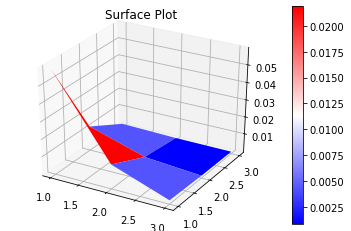

In [377]:
N = 1000
x1 = np.array([1 ,2 ,3])
x2 = np.array([1 ,2 ,3])

X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

Y_plot = multivariate_normal.pdf(x=X, mean=mean, cov=sigma)
Y_plot = Y_plot.reshape(X1.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Y_plot, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("Surface Plot")
fig.show()

In [376]:
np.linspace(-5, 5, 10)

array([-5.        , -3.88888889, -2.77777778, -1.66666667, -0.55555556,
        0.55555556,  1.66666667,  2.77777778,  3.88888889,  5.        ])

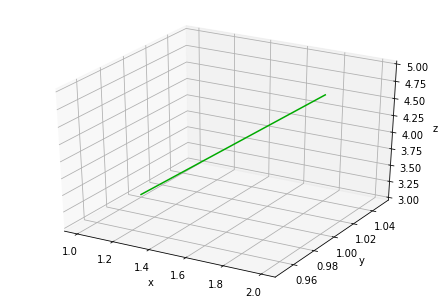

In [385]:
# (x, y, z)
x = [1, 2]
y = [1, 1]
z = [3, 5]
# 3Dでプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z, "-", color="#00aa00", mew=0.1)
# 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# 表示
plt.show()

In [388]:
gcode

,X,Y,Z,E
1,106.400,106.400,33.95,0.00000
5,106.400,113.600,0.00,933.00465
6,113.600,113.600,0.00,933.18426
7,113.600,106.400,0.00,933.36386
8,106.400,106.400,0.00,933.54347
...,...,...,...,...
157,105.999,108.111,0.00,936.71158
158,105.999,107.829,0.00,936.71809
159,105.999,107.546,0.00,936.72462
160,106.000,107.361,0.00,0.00000
